07.03.25, © Klymenko Vladyslav KI-21-1

## Лабораторна робота #1. Побудова простого лінійного бінарного класифікатора.

### Що ви будете вміти?
Познайомитеся з деякими можливостями бібліотеки NumPy.
Реалізувати простий лінійний класифікатор Розенблата мовою Python

### Завдання для самостійної роботи
1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
2. Побудувати бінарний класифікатор і вивести результати бінарної класифікації на графіку.

Знайдені ваги: [np.float64(0.8999999999999999), -1]


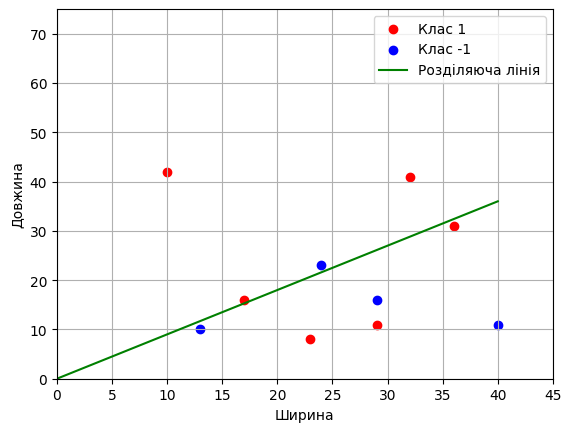

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних з файлу
data = np.loadtxt('data.txt')  # Зчитуємо файл, припускаючи формат: ознака1 ознака2 мітка
x_train = data[:, :2]          
y_train = data[:, 2]           

# Параметри алгоритму
n_train = len(x_train)                          # Розмір навчальної вибірки
w = [0, -1]                                     
a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # Правило класифікації
N = 150                                         
L = 0.1                                         
e = 0.1                                         
last_error_index = -1                           # Індекс останньої помилкової спостереження


for n in range(N):
    for i in range(n_train):               
        if y_train[i]*a(x_train[i]) < 0:   
            w[0] = w[0] + L * y_train[i]    
            last_error_index = i

   
    Q = sum([1 for i in range(n_train) if y_train[i]*a(x_train[i]) < 0])
    if Q == 0:      
        break       


if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print("Знайдені ваги:", w)


line_x = list(range(int(max(x_train[:, 0])) + 1))  
line_y = [w[0]*x for x in line_x]                  


x_0 = x_train[y_train == 1]   # Точки класу 1
x_1 = x_train[y_train == -1]  # Точки класу -1

# Побудова графіка
plt.scatter(x_0[:, 0], x_0[:, 1], color='red', label='Клас 1')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue', label='Клас -1')
plt.plot(line_x, line_y, color='green', label='Розділяюча лінія')

# Налаштування графіка
plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("Довжина")
plt.xlabel("Ширина")
plt.legend()
plt.grid(True)
plt.show()

3. Дати відповіді на контрольні запитання.


#### Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?

Основні принципи розпізнавання образів:
1. Аналіз ознак: Виокремлення значущих характеристик об'єкта (наприклад, форма, колір, текстура) для класифікації.
2. Моделювання: Використання алгоритмів (наприклад, персептрон, нейронні мережі) для вивчення залежностей між ознаками і класами об'єктів.
3. Навчання на вибірці: Алгоритм "навчається" на прикладах, щоб розпізнавати об'єкти в нових, невідомих даних.

#### Що таке навчальна вибірка і чому вона важлива для процесу розпізнавання образів?

Навчальна вибірка — це набір даних, який використовують для тренування моделі машинного навчання. Вона важлива, оскільки допомагає моделі навчитися розпізнавати закономірності і приймати рішення щодо нових, невідомих даних.

#### Зформулювати постановку задачі бінарної класифікації.

Задача бінарної класифікації полягає в тому, щоб побудувати модель, яка зможе класифікувати об'єкти на два класи, зазвичай позначені як 0 і 1 або +1 і -1. Наприклад, у задачі розпізнавання спаму в електронній пошті, завдання полягає в тому, щоб визначити, чи є конкретний лист спамом (+1), чи ні (-1).

Постановка задачі:
- Дано набір вхідних векторів (ознаки), де кожен вектор має певні числові значення, які описують об'єкт.
- Необхідно побудувати модель, яка за цими значеннями буде відносити об'єкти до одного з двох класів: 1 (позитивний клас) або -1 (негативний клас).
- Мета — знайти таку модель, яка з мінімальною кількістю помилок класифікує нові об'єкти, що раніше не зустрічалися в навчальній вибірці.

#### Що таке рівняння гіперплощини і як воно використовується для розв’язання задачі бінарної класифікації?

У задачах, де класи можна розділити лінійно (тобто існує пряма, яка може відокремити два класи), для цього використовують гіперплощину. Вона визначає межу, яка розділяє простір ознак на дві частини, що відповідають різним класам. У випадку двовимірного простору (як на графіку з двома ознаками), ця гіперплощина буде прямою лінією.

Рівняння гіперплощини для лінійної класифікації виглядає так:


$ w_1 x_1 + w_2 x_2 + b = 0 $
___
- $ w1,w2w_1, w_2w1,w2 $ — коефіцієнти ваг для кожної ознаки,
- $ x1,x2x_1, x_2x1,x2 $ — значення ознак для даного об'єкта,
- $ b $ — зміщення (intercept), що дозволяє переміщати лінію.

Задача — знайти таку гіперплощину (або лінію у двовимірному випадку), яка найкраще розділяє два класи. У задачах з лінійною класифікацією модель обчислює значення для кожного нового об'єкта та порівнює його з нулем, щоб визначити, до якого класу належить об'єкт.

#### Кроки для розв’язання задачі бінарної класифікації за допомогою машинного навчання:

Збір даних: Перш за все, необхідно зібрати та підготувати дані для навчання. Дані повинні бути розбиті на вхідні ознаки та відповідні мітки класів.

Передобробка даних: Це може включати очищення даних (видалення пропущених значень), нормалізацію, стандартизацію або перетворення даних у зручний формат.

Розподіл даних: Поділити дані на дві частини: навчальну вибірку (для тренування моделі) та тестову вибірку (для перевірки точності моделі).

Вибір моделі: Вибрати модель, яка підходить для задачі. Це може бути лінійний класифікатор (наприклад, персептрон), дерево рішень або інша модель.

Навчання моделі: Потрібно налаштувати параметри моделі на основі навчальної вибірки. Алгоритм буде шукати параметри (наприклад, ваги в лінійній моделі), які найкраще розділяють класи.

4. Відправити результати роботи у файлі lab_1_Klymenko.ipynb до віддаленого репозиторію на GіtHub.
